In [56]:
# Importing the dataset
dataset <- read.csv("D:\\projectR\\datafiles\\creditcard.csv", header = TRUE,
                stringsAsFactors = FALSE,
                strip.white = TRUE ,
                sep = ',')

In [57]:
dataset<- dataset[c(7,8,9,14,15,16,20,21,22,27,28,31)]#cor

In [58]:
dataset$Class = as.factor(dataset$Class)

In [59]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Class, SplitRatio = 0.8)
training.new = subset(dataset, split == TRUE)
test.new = subset(dataset, split == FALSE)
summary(training.new$Class)
summary(test.new$Class)

0      1 
227452    394

0     1 
56863    98

In [60]:
#install.packages("ROSE")
#Implementing oversampling
#library(ROSE)
#training = ovun.sample(Class~., data = training.new, method = 'over', 
 #                      N =2*227452 , seed = 1234)$data
#summary(training$Class)
#BY DOING SAMPLING OUTPUT IS NOT GOOD

0      1 
227452 227452

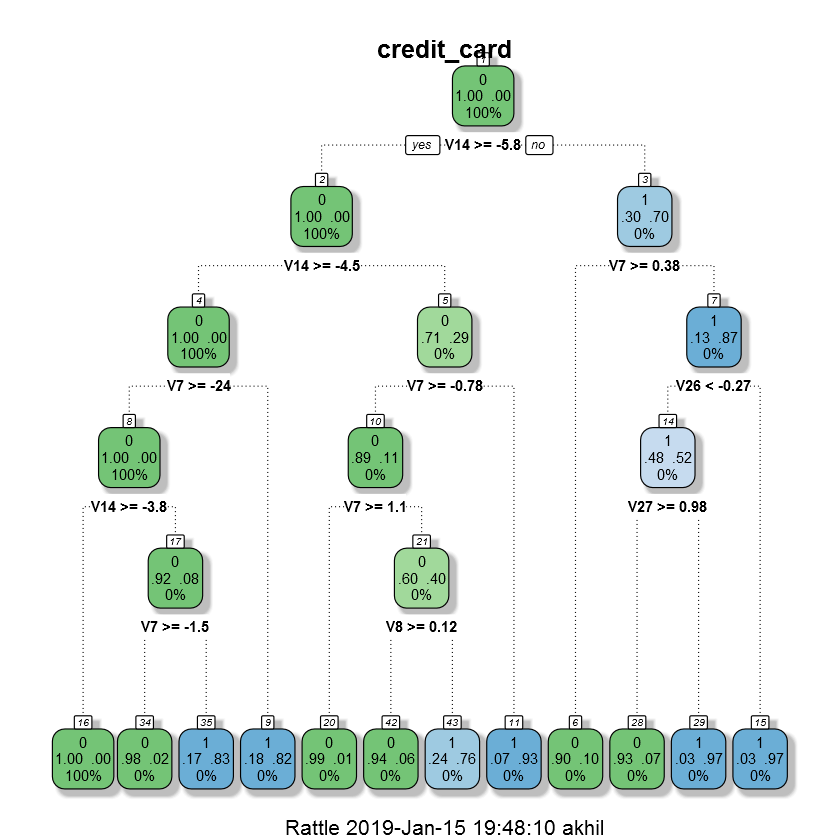

In [82]:
# load libraries
library(rpart)
library(rattle)
 
rpart <- rpart(Class ~ ., data=training.new, method="class",)

# plot decision tree
fancyRpartPlot(rpart, main="credit_card")

In [83]:
head(training)

V6,V7,V8,V13,V14,V15,V19,V20,V21,V26,V27,Class
0.46238778,0.239598554,0.09869790,-0.9913898,-0.31116935,1.46817697,0.40399296,0.25141210,-0.01830678,-0.1891148,0.133558377,0
-0.08236081,-0.078802983,0.08510165,0.4890950,-0.14377230,0.63555809,-0.14578304,-0.06908314,-0.22577525,0.1258945,-0.008983099,0
1.80049938,0.791460956,0.24767579,0.7172927,-0.16594592,2.34586495,-2.26185710,0.52497973,0.24799815,-0.1390966,-0.055352794,0
-0.02972755,0.476200949,0.26031433,-0.3580907,-0.13713370,0.51761681,-0.03319379,0.08496767,-0.20825351,0.1059148,0.253844225,0
0.27270812,-0.005159003,0.08121294,-0.7510627,0.16737196,0.05014359,-0.04557504,-0.21963255,-0.16771627,-0.2572368,0.034507430,0
3.72181806,0.370145128,0.85108444,-0.2862536,0.07435536,-0.32878305,0.57032817,0.05273567,-0.07342510,-0.3841573,0.011747356,0


In [84]:
#library(MASS)

In [87]:
testPred <- predict(rpart, test.new[-12 ], type = 'class')

In [88]:
table(testPred, test.new$Class)

        
testPred     0     1
       0 56852    26
       1    11    72